In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

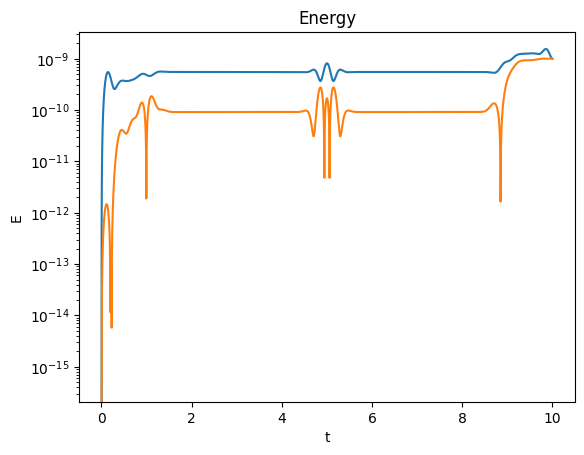

In [3]:
df = pd.read_csv("config/data/out_01/csv/output.csv")

fig, ax = plt.subplots()
ax.plot(df["t"], np.abs(df["Ebase"] - df["Ebase"].iloc[0]))
ax.plot(df["t"], np.abs(df["E"] - df["E"].iloc[0]))
ax.set_yscale("log")
ax.set_title("Energy")
ax.set_xlabel("t")
ax.set_ylabel("E")
plt.show()

In [10]:
import glob
import h5py as h5

csv_folder = "config/data/out_01/csv"

x_files = glob.glob(f"{csv_folder}/x_*.csv")
num_levels = len(x_files)

x_list = []
for i in range(num_levels):
    data = np.loadtxt(f"{csv_folder}/x_0{i+1}.csv")
    x_list.append(data)


h5_folder = "config/data/out_01/data"
data_index = pd.read_csv(f"{h5_folder}/_index.csv")

def get_data(input_time):
    item = data_index.iloc[(data_index["time"] - input_time).abs().argsort()[0]]
    time = item["time"]
    filename = item["filename"]
    data = h5.File(f"{h5_folder}/{filename}", "r")
    return time, data


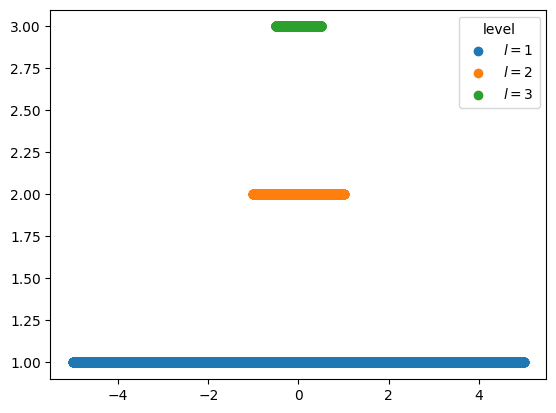

In [11]:
# plot grid
fig, ax = plt.subplots()


def lpad(x, width):
    return str(x).zfill(width)


for l in range(1, num_levels + 1):
    x = x_list[l-1]
    y = np.zeros_like(x)
    y[:] = l
    ax.scatter(
        x,
        y,
        label=f"$l = {l}$",
    )

ax.legend(title="level")

In [12]:
# psi = amp * exp(-((x - x0) / sig)^2)
# amp=1.0, sig=0.25, x0=0.0

def gaussian(x, t, amp=1.0, sig=0.25, x0=0.0):
    # For the 1D wave equation, the solution at time t is:
    # u(x,t) = (f(x-ct) + f(x+ct))/2 where f is the initial condition
    # For a Gaussian initial condition, this gives:
    return (amp/2) * (np.exp(-((x - x0 - t)/sig)**2) + np.exp(-((x - x0 + t)/sig)**2))

In [26]:
y

<HDF5 dataset "state": shape (10007, 2), type "<f8">

Text(0.5, 1.0, 't = 3.999999999999143')

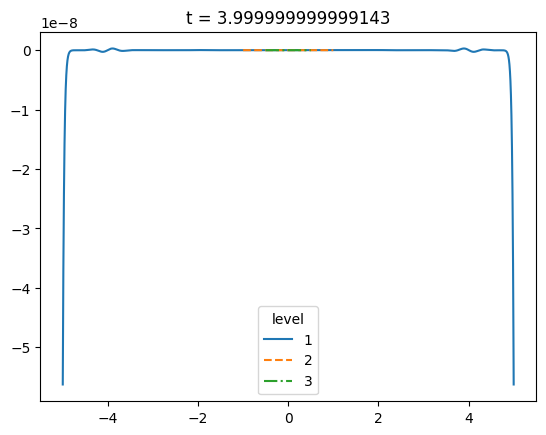

In [29]:
t_target = 4
t_target, t_data = get_data(t_target)
""
fig, ax = plt.subplots()

linestyles = ["-", "--", "-.", ":"]

for l in range(1, num_levels + 1):
    x = x_list[l-1]
    level = t_data[f"level{lpad(l, 2)}"]
    y = t_data[f"level{lpad(l, 2)}"]["state"][:, 0]
    y_true = gaussian(x, t_target)
    ax.plot(x, y - y_true, label=f"${l}$", linestyle=linestyles[l-1])

ax.legend(title="level")
ax.set_title(f"t = {t_target}")